In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('framingham.csv')

In EDA, we saw, that education has actually a weak negative correlation to the target, so we exclude it.

In [3]:
df = df.drop(columns=['education'])

Next, we have to consider missing values.

Because of this is just a learning-driven project, I simply fill missing values with median.

We can also use mean, or interpolate, but now, for the sake of simplicity, I use median.

In [5]:
df.fillna(df.median(), inplace=True)
df.isna().sum()

sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Next, I define the features and the target variable

In [6]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

Now we have to scale our data.

Scaling our data is a critical step in our analysis. Without it, we risk encountering a ConvergenceWarning, indicating that the Limited-memory Broyden–Fletcher–Goldfarb–Shanno (LBFGS) Algorithm has failed to converge.

This step ensures that each feature contributes equally, facilitates faster convergence, and aids in regularization

In [7]:
#Split the data into training and test, and then scaling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In our exploratory data analysis (EDA), we discovered that our dataset is skewed, with a minority class comprising only 15% of the data. This class imbalance can mislead the training process, necessitating corrective measures

Before delving into detailed examples, I'd like to illustrate how accuracy and intuition can be deceptive when evaluating models.

Without balancing the data, our model achieves an accuracy of 85.73%, which may seem impressive initially. However, a closer examination reveals concerning discrepancies in other performance metrics. For instance, the recall in the majority class is 0.99, while in the minority class, it's only 0.07. Similarly, the F1-score in the majority class is 0.92, but in the minority class, it's just 0.13.

Despite achieving an impressive accuracy of 85.73%, our model's performance metrics reveal significant disparities when assessing its effectiveness. While accuracy alone may initially seem satisfactory, a deeper analysis exposes concerning discrepancies in other crucial performance metrics.

In particular, the recall rate for the majority class stands impressively high at 0.99, indicating the model's ability to correctly identify instances belonging to this class. However, the picture is starkly different for the minority class, where the recall rate plunges to a mere 0.07. This alarming contrast underscores the model's struggle to accurately capture instances from the minority class, posing a potential risk in real-world applications.

Similarly, the F1-score, a harmonic mean of precision and recall, demonstrates a notable disparity between the majority and minority classes. While the F1-score for the majority class is commendable at 0.92, indicating a strong balance between precision and recall, the minority class's F1-score is strikingly low at 0.13. This discrepancy highlights the model's challenge in achieving both high precision and recall for the minority class, indicating potential limitations in its performance for this crucial subset of data.

These findings underscore the importance of considering multiple performance metrics beyond accuracy alone, particularly in the context of imbalanced datasets. While accuracy provides a superficial measure of overall model performance, it fails to capture nuances such as class imbalances and the associated trade-offs in precision and recall. As we proceed, we'll explore techniques to address these discrepancies and enhance the model's effectiveness in capturing minority class instances.

For further insights on addressing class imbalance, I recommend reading this insightful article:
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

To tackle this problem, I'll employ an oversampling technique called Synthetic Minority Oversampling Technique (SMOTE).

Later, we'll evaluate how SMOTE improves our recall and F1-score while simultaneously reducing the overall accuracy. It's important to recognize the tradeoff involved in such techniques, especially in real-world scenarios where careful consideration of features and balancing techniques is crucial. However, for demonstrative purposes, I'll proceed with SMOTE.

In [8]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

To showcase the impact of Synthetic Minority Over-sampling Technique (SMOTE), let's examine the distribution of the target variable (y_train) before and after applying the algorithm:

Before SMOTE:

- Class 0 (no heart disease): 2870 samples
- Class 1 (heart disease): 520 samples


After SMOTE:

- Class 0 (no heart disease): 2870 samples
- Class 1 (heart disease): 2870 samples


This comparison highlights the transformation brought about by SMOTE, which balances the distribution of both classes by synthesizing new instances of the minority class (class 1) to match the frequency of the majority class (class 0). As a result, the dataset becomes more balanced, addressing the initial class imbalance and potentially improving the model's performance in capturing instances from the minority class.







In [10]:
#Training the model
model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)
y_pred = model.predict(X_test)


In [11]:
#And now, print out the metrics of the algorithm
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6391509433962265
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       724
           1       0.23      0.65      0.34       124

    accuracy                           0.64       848
   macro avg       0.57      0.64      0.55       848
weighted avg       0.81      0.64      0.69       848



[[462 262]
 [ 44  80]]


                Predicted Negative    Predicted Positive
Actual Negative           TN                    FP
Actual Positive           FN                    TP


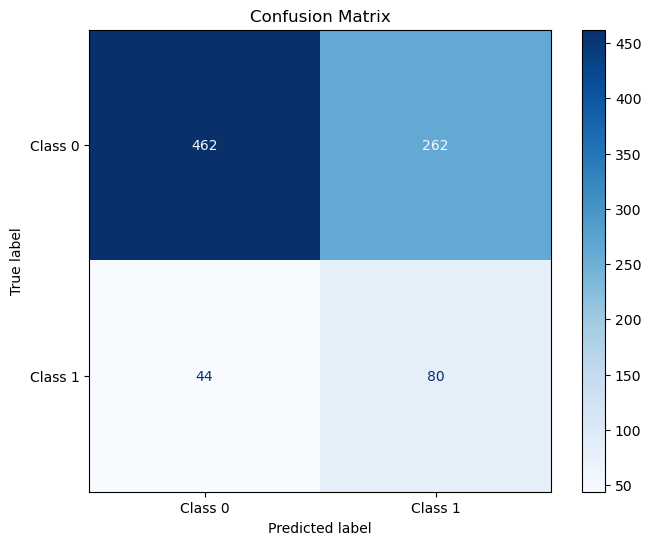

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you already have the confusion matrix 'cm'
# Create a ConfusionMatrixDisplay object
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n')
print('                Predicted Negative    Predicted Positive')
print('Actual Negative           TN                    FP')
print('Actual Positive           FN                    TP')

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap='Blues', ax=ax)  # You can specify other parameters like cmap (color map)
plt.title('Confusion Matrix')
plt.show()

To showcase the differences, let me show the confusion matrix in an array form without balancing the data:

In [16]:
print('''
Confusion Matrix:

[[718   6]
[115   9]]''')


Confusion Matrix:

[[718   6]
[115   9]]


The mentioned trade-off is better performance in True Positive and False Negative predictions, where the predicted outcome and the actual label are equal, and vica-versa, but decreased performance in the True Negatives and False Positives.